In [612]:
import requests
url = 'https://apitempo.inmet.gov.br/estacao/2021-07-07/2022-06-08/A201'
resultado = requests.get(url)

In [613]:
import json
dados_org = resultado.json()
dados_str = json.dumps(dados_org)


In [614]:
import pandas as pd
import numpy as np

In [615]:
dados_tabla = pd.read_json(dados_str)
dados_tabla


,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,BELÉM,1011.9,NaN,-1.411228,1011.9,PA,0.8,24.0,23.8,-48.439512,...,1.1,24.0,24.4,13.1,4.3,26.0,23.8,NaN,A201,0
1,BELÉM,1012.0,NaN,-1.411228,1012.1,PA,1.8,23.9,23.7,-48.439512,...,0.7,23.8,23.8,13.0,4.2,26.0,23.8,NaN,A201,100
2,BELÉM,1012.3,NaN,-1.411228,1012.3,PA,-0.3,23.9,23.6,-48.439512,...,0.0,23.8,24.0,13.0,3.8,25.0,23.7,NaN,A201,200
3,BELÉM,1011.5,NaN,-1.411228,1012.4,PA,-1.0,24.0,23.6,-48.439512,...,0.2,23.9,23.9,13.0,1.7,25.0,23.6,NaN,A201,300
4,BELÉM,1011.2,NaN,-1.411228,1011.5,PA,-2.5,23.7,23.3,-48.439512,...,0.0,23.7,23.6,13.0,1.6,25.0,23.3,NaN,A201,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8083,BELÉM,1006.4,31.5,-1.411228,1006.5,PA,709.0,23.6,29.8,-48.439512,...,1.6,22.9,32.2,14.5,4.6,34.0,29.8,69.0,A201,1900
8084,BELÉM,1007.0,29.3,-1.411228,1007.1,PA,158.4,24.2,26.4,-48.439512,...,1.1,23.4,29.9,13.2,6.6,32.0,26.4,88.0,A201,2000
8085,BELÉM,1007.3,28.5,-1.411228,1007.4,PA,38.0,23.6,25.6,-48.439512,...,0.8,23.6,26.4,13.1,3.7,29.0,25.6,89.0,A201,2100
8086,BELÉM,1008.4,28.9,-1.411228,1008.4,PA,2.6,24.0,25.4,-48.439512,...,0.0,23.4,25.7,13.1,2.2,28.0,25.6,91.0,A201,2200


In [616]:
dados = dados_tabla[['DT_MEDICAO', 'HR_MEDICAO', 'TEM_INS', 'UMD_INS', 'RAD_GLO']]
dados

,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS,RAD_GLO
0,2021-07-07,0,23.8,NaN,0.8
1,2021-07-07,100,23.8,NaN,1.8
2,2021-07-07,200,23.7,NaN,-0.3
3,2021-07-07,300,23.6,NaN,-1.0
4,2021-07-07,400,23.3,NaN,-2.5
...,...,...,...,...,...
8083,2022-06-08,1900,29.8,69.0,709.0
8084,2022-06-08,2000,26.4,88.0,158.4
8085,2022-06-08,2100,25.6,89.0,38.0
8086,2022-06-08,2200,25.6,91.0,2.6


# Renomia o titulo do nosso dados

In [617]:
dados.columns = ['DATA','HORARIO', 'TEMPERATURA', 'UMIDADE', 'RADIACAO']

In [618]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
0,2021-07-07,0,23.8,NaN,0.8
1,2021-07-07,100,23.8,NaN,1.8
2,2021-07-07,200,23.7,NaN,-0.3
3,2021-07-07,300,23.6,NaN,-1.0
4,2021-07-07,400,23.3,NaN,-2.5
...,...,...,...,...,...
8083,2022-06-08,1900,29.8,69.0,709.0
8084,2022-06-08,2000,26.4,88.0,158.4
8085,2022-06-08,2100,25.6,89.0,38.0
8086,2022-06-08,2200,25.6,91.0,2.6


<AxesSubplot:title={'center':'TEMPERATURA'}, xlabel='HORARIO'>

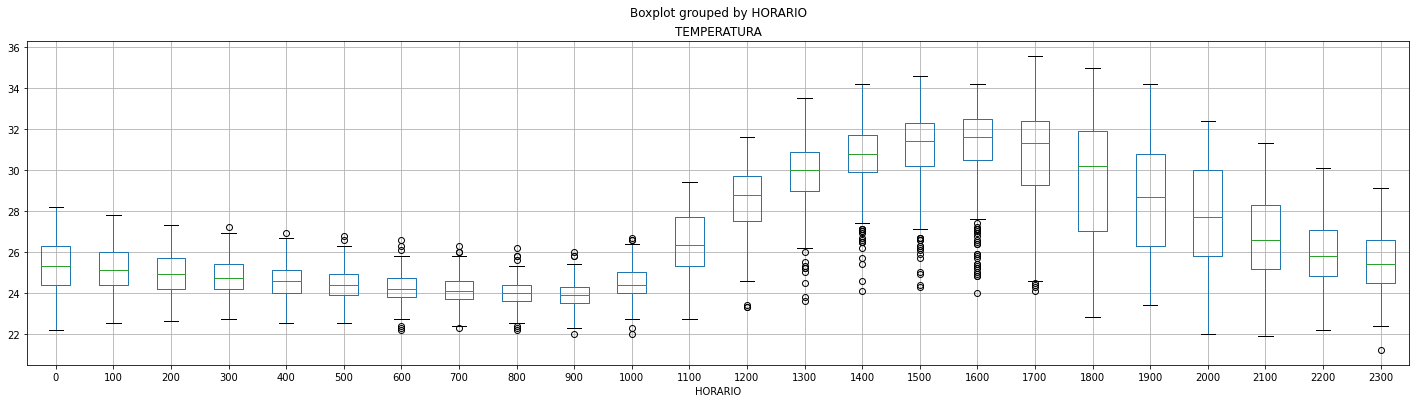

In [619]:
dados.boxplot("TEMPERATURA", by='HORARIO', figsize=(24,6))

<AxesSubplot:title={'center':'UMIDADE'}, xlabel='HORARIO'>

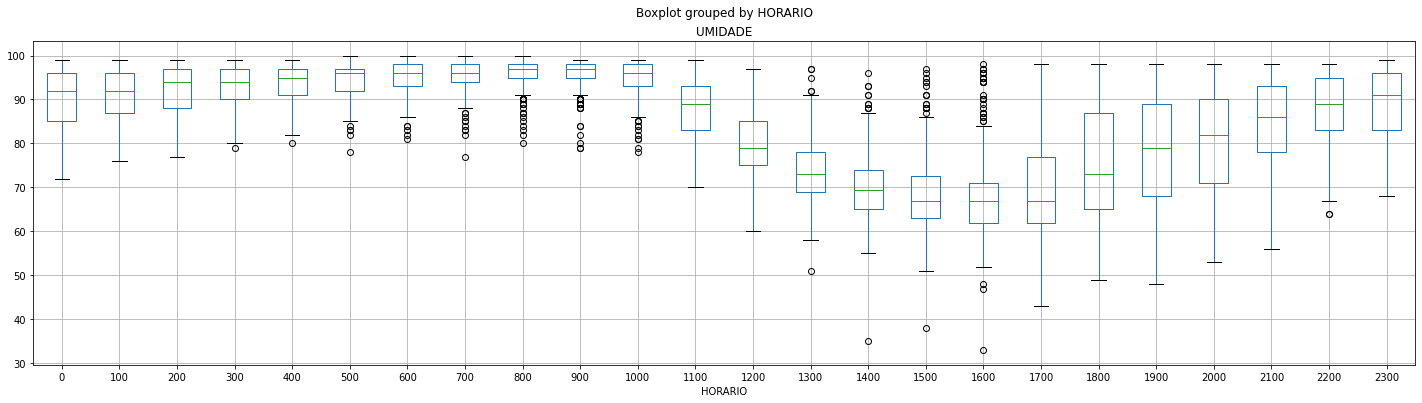

In [620]:
dados.boxplot("UMIDADE", by='HORARIO', figsize=(24,6))

<AxesSubplot:title={'center':'RADIACAO'}, xlabel='HORARIO'>

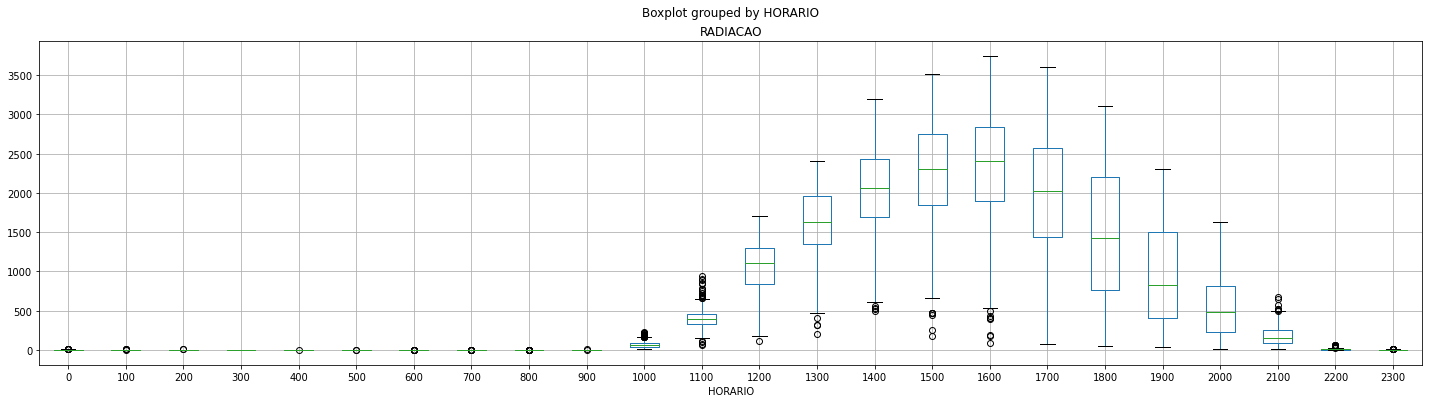

In [621]:
dados.boxplot("RADIACAO", by='HORARIO', figsize=(24,6))

# Verificando a suma de dados null 

In [622]:
dados.apply(pd.isnull).sum()/dados.shape[0]

DATA           0.000000
HORARIO        0.000000
TEMPERATURA    0.011251
UMIDADE        0.015084
RADIACAO       0.011251
dtype: float64

In [623]:
dados[pd.isnull(dados['TEMPERATURA'])]

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
2000,2021-09-28,800,NaN,NaN,NaN
2001,2021-09-28,900,NaN,NaN,NaN
2002,2021-09-28,1000,NaN,NaN,NaN
2003,2021-09-28,1100,NaN,NaN,NaN
2004,2021-09-28,1200,NaN,NaN,NaN
...,...,...,...,...,...
5711,2022-03-01,2300,NaN,NaN,NaN
5761,2022-03-04,100,NaN,NaN,NaN
5858,2022-03-08,200,NaN,NaN,NaN
5953,2022-03-12,100,NaN,NaN,NaN


In [624]:
dados = dados.fillna(method='ffill')

In [625]:
dados.apply(pd.isnull).sum()/dados.shape[0]

DATA           0.00000
HORARIO        0.00000
TEMPERATURA    0.00000
UMIDADE        0.00136
RADIACAO       0.00000
dtype: float64

# verificando se nosso dados são numéricos

In [626]:
dados.dtypes

DATA            object
HORARIO          int64
TEMPERATURA    float64
UMIDADE        float64
RADIACAO       float64
dtype: object

<AxesSubplot:>

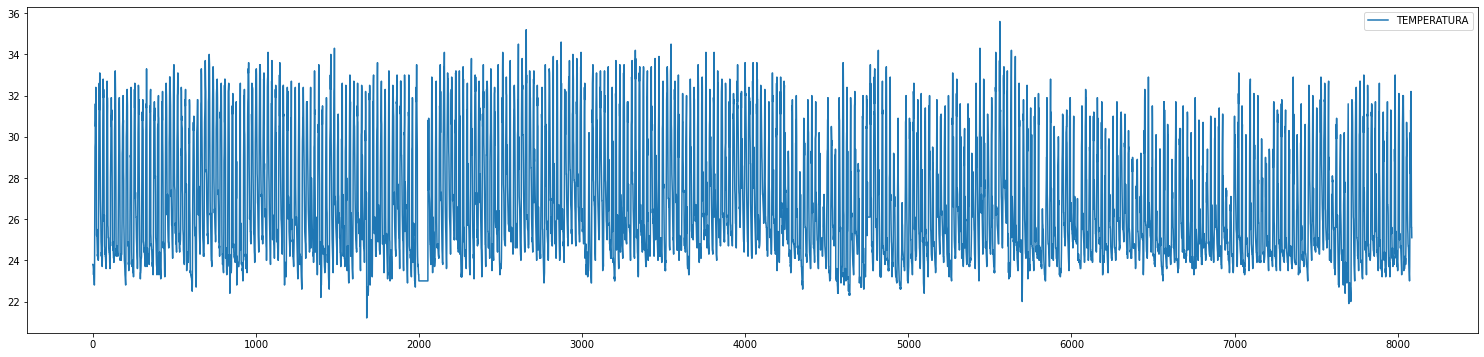

In [627]:
dados[['TEMPERATURA']].plot(figsize=(26,6))

# Agrupando os dados por horário

In [628]:
dados.groupby(dados.HORARIO).sum()

,TEMPERATURA,UMIDADE,RADIACAO
HORARIO,,,
0,8547.4,30267.0,-344.7
100,8485.9,30589.0,-459.9
200,8414.1,30939.0,-530.2
300,8348.3,31248.0,-608.8
400,8281.6,31508.0,-626.4
500,8220.2,31714.0,-649.5
600,8170.1,31895.0,-654.9
700,8121.4,32031.0,-653.2
800,8079.6,32149.0,-657.7


In [629]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
0,2021-07-07,0,23.8,NaN,0.8
1,2021-07-07,100,23.8,NaN,1.8
2,2021-07-07,200,23.7,NaN,-0.3
3,2021-07-07,300,23.6,NaN,-1.0
4,2021-07-07,400,23.3,NaN,-2.5
...,...,...,...,...,...
8083,2022-06-08,1900,29.8,69.0,709.0
8084,2022-06-08,2000,26.4,88.0,158.4
8085,2022-06-08,2100,25.6,89.0,38.0
8086,2022-06-08,2200,25.6,91.0,2.6


### Criando novos colunas para Temperatura da amahão, Umidade da amahão e Radiação da amahão na tabla 

In [630]:
dados['TEMP_AMANHA'] = dados.shift(-1)['TEMPERATURA']
dados['TEMP_MES_MIX'] = dados['TEMPERATURA'].rolling(30).mean()

In [631]:
dados['UMID_AMANHA'] = dados.shift(-1)['UMIDADE']
dados['UMID_MES_MIX'] = dados['UMIDADE'].rolling(30).mean()

In [632]:
dados['RADI_AMANHA'] = dados.shift(-1)['RADIACAO']
dados['RADI_MES_MIX'] = dados['RADIACAO'].rolling(30).mean()

In [633]:
dados['HORARIO_ATUAL'] = dados.shift(3)['HORARIO']


In [634]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO,TEMP_AMANHA,TEMP_MES_MIX,UMID_AMANHA,UMID_MES_MIX,RADI_AMANHA,RADI_MES_MIX,HORARIO_ATUAL
0,2021-07-07,0,23.8,NaN,0.8,23.8,NaN,NaN,NaN,1.8,NaN,NaN
1,2021-07-07,100,23.8,NaN,1.8,23.7,NaN,NaN,NaN,-0.3,NaN,NaN
2,2021-07-07,200,23.7,NaN,-0.3,23.6,NaN,NaN,NaN,-1.0,NaN,NaN
3,2021-07-07,300,23.6,NaN,-1.0,23.3,NaN,NaN,NaN,-2.5,NaN,0.0
4,2021-07-07,400,23.3,NaN,-2.5,23.5,NaN,NaN,NaN,-1.5,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8083,2022-06-08,1900,29.8,69.0,709.0,26.4,26.960000,88.0,82.566667,158.4,967.646667,1600.0
8084,2022-06-08,2000,26.4,88.0,158.4,25.6,26.870000,89.0,83.033333,38.0,892.953333,1700.0
8085,2022-06-08,2100,25.6,89.0,38.0,25.6,26.700000,91.0,83.633333,2.6,798.586667,1800.0
8086,2022-06-08,2200,25.6,91.0,2.6,25.1,26.553333,93.0,84.166667,-2.5,706.776667,1900.0


In [635]:
dados.apply(pd.isnull).sum()/dados.shape[0]

DATA             0.000000
HORARIO          0.000000
TEMPERATURA      0.000000
UMIDADE          0.001360
RADIACAO         0.000000
TEMP_AMANHA      0.000124
TEMP_MES_MIX     0.003586
UMID_AMANHA      0.001360
UMID_MES_MIX     0.004946
RADI_AMANHA      0.000124
RADI_MES_MIX     0.003586
HORARIO_ATUAL    0.000371
dtype: float64

### Limpando NULL

In [636]:
dados = dados.iloc[63:,:].copy()
dados = dados.iloc[:-1, :].copy()

In [637]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO,TEMP_AMANHA,TEMP_MES_MIX,UMID_AMANHA,UMID_MES_MIX,RADI_AMANHA,RADI_MES_MIX,HORARIO_ATUAL
63,2021-07-09,1500,32.8,61.0,2669.5,32.1,27.863333,63.0,78.600000,2571.9,938.226667,1200.0
64,2021-07-09,1600,32.1,63.0,2571.9,31.9,28.130000,66.0,77.366667,1768.0,1022.620000,1300.0
65,2021-07-09,1700,31.9,66.0,1768.0,32.3,28.313333,60.0,76.400000,2011.6,1068.063333,1400.0
66,2021-07-09,1800,32.3,60.0,2011.6,31.5,28.426667,66.0,75.800000,599.2,1095.230000,1500.0
67,2021-07-09,1900,31.5,66.0,599.2,29.4,28.456667,72.0,75.800000,822.2,1044.700000,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8082,2022-06-08,1800,32.2,58.0,2455.7,29.8,26.933333,69.0,82.666667,709.0,1012.166667,1500.0
8083,2022-06-08,1900,29.8,69.0,709.0,26.4,26.960000,88.0,82.566667,158.4,967.646667,1600.0
8084,2022-06-08,2000,26.4,88.0,158.4,25.6,26.870000,89.0,83.033333,38.0,892.953333,1700.0
8085,2022-06-08,2100,25.6,89.0,38.0,25.6,26.700000,91.0,83.633333,2.6,798.586667,1800.0


In [638]:
dados.apply(pd.isnull).sum()/dados.shape[0]

DATA             0.0
HORARIO          0.0
TEMPERATURA      0.0
UMIDADE          0.0
RADIACAO         0.0
TEMP_AMANHA      0.0
TEMP_MES_MIX     0.0
UMID_AMANHA      0.0
UMID_MES_MIX     0.0
RADI_AMANHA      0.0
RADI_MES_MIX     0.0
HORARIO_ATUAL    0.0
dtype: float64

In [639]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [640]:
from sklearn.metrics import mean_absolute_percentage_error

In [641]:
ridge = Ridge()
parametros = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
reg = GridSearchCV(ridge,parametros, cv=5)
#reg = Ridge(alpha=0, solver='auto', fit_intercept=True, max_iter=None, tol=0.001, copy_X=True)

In [696]:
numerio_de_dados = len(dados)+37

In [697]:
def criar_previsões_temp(preditores, dados, reg):
    #numerio_de_dados = len(dados)-24
    trinar = dados.loc[:numerio_de_dados]
    teste = dados.loc[numerio_de_dados:]
    reg.fit(trinar[preditores], trinar["TEMPERATURA"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["TEMPERATURA"],preditores)
    conjunto = pd.concat([teste['TEMPERATURA'], pd.Series(preditores, index=teste.index )], axis=1)
    conjunto.columns = ['ATUAL_TEMPERATURA', 'PREVISOES_TEMPERATURA']
    conjunto[['DATA','HORARIO']] = teste[['DATA','HORARIO_ATUAL']]
    print(reg.best_params_)
    return erro, conjunto

In [698]:
def criar_previsões_umid(preditores, dados, reg):
    trinar = dados.loc[:numerio_de_dados]
    teste = dados.loc[numerio_de_dados:]
    reg.fit(trinar[preditores], trinar["UMIDADE"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["UMIDADE"],preditores)
    conjunto = pd.concat([teste["UMIDADE"], pd.Series(preditores, index=teste.index)], axis=1)
    conjunto.columns = ["ATUAL_UMIDADE", "PREVISOES_UMIDADE"]
    return erro, conjunto

In [699]:
def criar_previsões_radi(preditores, dados, reg):
    trinar = dados.loc[:numerio_de_dados]
    teste = dados.loc[numerio_de_dados:]
    reg.fit(trinar[preditores], trinar["RADI_AMANHA"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["RADI_AMANHA"],preditores)
    conjunto = pd.concat([teste["RADI_AMANHA"], pd.Series(preditores, index=teste.index)], axis=1)
    conjunto.columns = ["ATUAL_RADIACAO", "PREVISOES_RADIACAO"]
    return erro, conjunto

In [700]:
preditores = ['HORARIO', 'TEMP_AMANHA','UMID_AMANHA', 'RADIACAO','TEMP_MES_MIX', 'UMID_MES_MIX','RADI_MES_MIX']

In [701]:
temp_erro, temp_previsao = criar_previsões_temp(preditores, dados, reg)

{'alpha': 5}


In [702]:
umid_erro, umid_previsao = criar_previsões_umid(preditores, dados, reg)

In [703]:
radi_erro, radi_previsao = criar_previsões_radi(preditores, dados, reg)

In [704]:
previsoes_dados = temp_previsao

In [705]:
previsoes_dados[["ATUAL_UMIDADE", "PREVISOES_UMIDADE"]] = umid_previsao[["ATUAL_UMIDADE", "PREVISOES_UMIDADE"]]

In [706]:
previsoes_dados[["ATUAL_RADIACAO", "PREVISOES_RADIACAO"]] = radi_previsao[["ATUAL_RADIACAO", "PREVISOES_RADIACAO"]]

In [707]:
previsoes_dados = previsoes_dados[['DATA','HORARIO','ATUAL_TEMPERATURA','PREVISOES_TEMPERATURA','ATUAL_UMIDADE','PREVISOES_UMIDADE','ATUAL_RADIACAO','PREVISOES_RADIACAO']]

In [708]:
previsoes_dados2 = previsoes_dados[['HORARIO','PREVISOES_TEMPERATURA','PREVISOES_UMIDADE','PREVISOES_RADIACAO']]

In [709]:
previsoes_dados2

,HORARIO,PREVISOES_TEMPERATURA,PREVISOES_UMIDADE,PREVISOES_RADIACAO
8061,1800.0,25.901371,85.158781,-66.635947
8062,1900.0,25.591211,85.798707,-78.240328
8063,2000.0,25.274708,88.240483,-139.658763
8064,2100.0,24.487350,91.740684,68.467417
8065,2200.0,24.369041,92.242430,114.908795
8066,2300.0,24.192257,93.686074,98.635290
8067,0.0,23.959133,94.899108,39.442124
8068,100.0,23.866316,95.715498,-32.012088
8069,200.0,23.807526,96.038581,-77.511824
8070,300.0,23.749052,96.360390,-122.939331


In [710]:
previsoes_dados

,DATA,HORARIO,ATUAL_TEMPERATURA,PREVISOES_TEMPERATURA,ATUAL_UMIDADE,PREVISOES_UMIDADE,ATUAL_RADIACAO,PREVISOES_RADIACAO
8061,2022-06-07,1800.0,25.9,25.901371,84.0,85.158781,3.4,-66.635947
8062,2022-06-07,1900.0,25.5,25.591211,85.0,85.798707,-0.4,-78.240328
8063,2022-06-07,2000.0,25.3,25.274708,85.0,88.240483,-2.0,-139.658763
8064,2022-06-08,2100.0,24.8,24.487350,89.0,91.740684,-2.4,68.467417
8065,2022-06-08,2200.0,24.7,24.369041,90.0,92.242430,-2.4,114.908795
8066,2022-06-08,2300.0,24.7,24.192257,90.0,93.686074,-2.3,98.635290
8067,2022-06-08,0.0,24.5,23.959133,92.0,94.899108,-3.5,39.442124
8068,2022-06-08,100.0,24.1,23.866316,94.0,95.715498,-3.0,-32.012088
8069,2022-06-08,200.0,23.8,23.807526,96.0,96.038581,-2.3,-77.511824
8070,2022-06-08,300.0,23.6,23.749052,97.0,96.360390,-2.2,-122.939331


In [711]:
previsoes_dados.to_csv('garoa.csv', index=False)

In [712]:
dados.to_csv('garoa_raw.csv', index=False)


In [713]:
#previsoes_dados.to_excel('garoa.xls', index=False)

In [714]:
umid_erro

0.04194558868687161

In [715]:
temp_erro

0.022349501230286114

In [716]:
radi_erro

27.139873126438893

<AxesSubplot:>

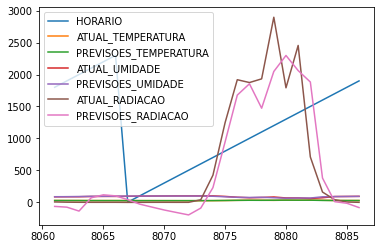

In [717]:
previsoes_dados.plot()

<AxesSubplot:title={'center':'TEMPERATURA'}, xlabel='HORARIO'>

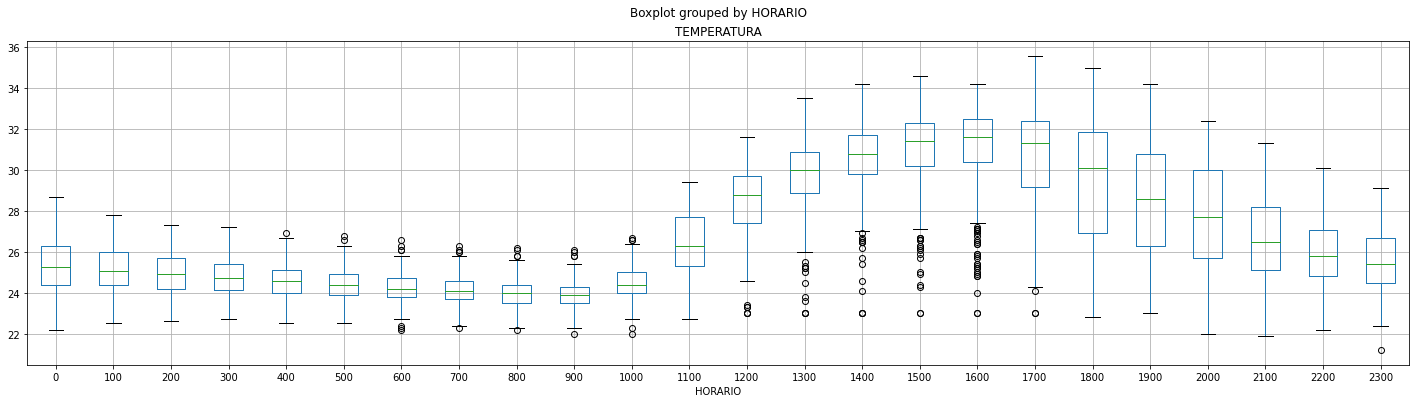

In [718]:
dados.boxplot("TEMPERATURA", by='HORARIO', figsize=(24,6))

<AxesSubplot:title={'center':'PREVISOES_TEMPERATURA'}, xlabel='HORARIO'>

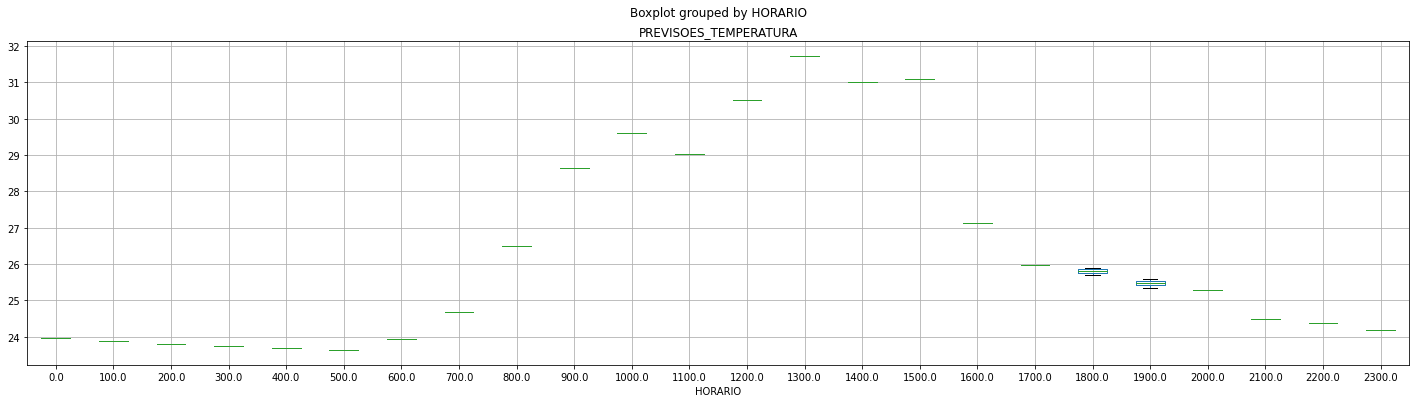

In [719]:
previsoes_dados.boxplot("PREVISOES_TEMPERATURA", by='HORARIO', figsize=(24,6))

In [720]:
import matplotlib.pyplot as plt


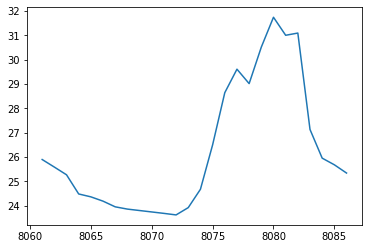

In [721]:
plt.plot( previsoes_dados.PREVISOES_TEMPERATURA)
#plt.plot(previsoes_dados.HORARIO, previsoes_dados.ATUAL_UMIDADE)
#plt.plot(previsoes_dados.HORARIO, previsoes_dados.ATUAL_RADIACAO)

plt.show()